In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
universal = pd.read_csv('/Users/linanguyen/Desktop/universal_studio_branches.csv')
universal.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [3]:
#checking for null values
universal.isnull().sum()


reviewer        0
rating          0
written_date    0
title           0
review_text     0
branch          0
dtype: int64

In [4]:
#check for unique values 
universal.nunique()

reviewer        44086
rating              5
written_date     4276
title           37522
review_text     50847
branch              3
dtype: int64

In [5]:
#checking for shape
universal.shape

(50904, 6)

In [7]:
#checking for data types
universal['rating'] = pd.to_numeric(universal['rating'])
universal.dtypes

reviewer         object
rating          float64
written_date     object
title            object
review_text      object
branch           object
dtype: object

In [8]:
#changing written data to actual date
universal['written_date'] = pd.to_datetime(universal['written_date'])
universal.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


Text(0.5, 1.0, 'Frequency of Universal Studio Ratings')

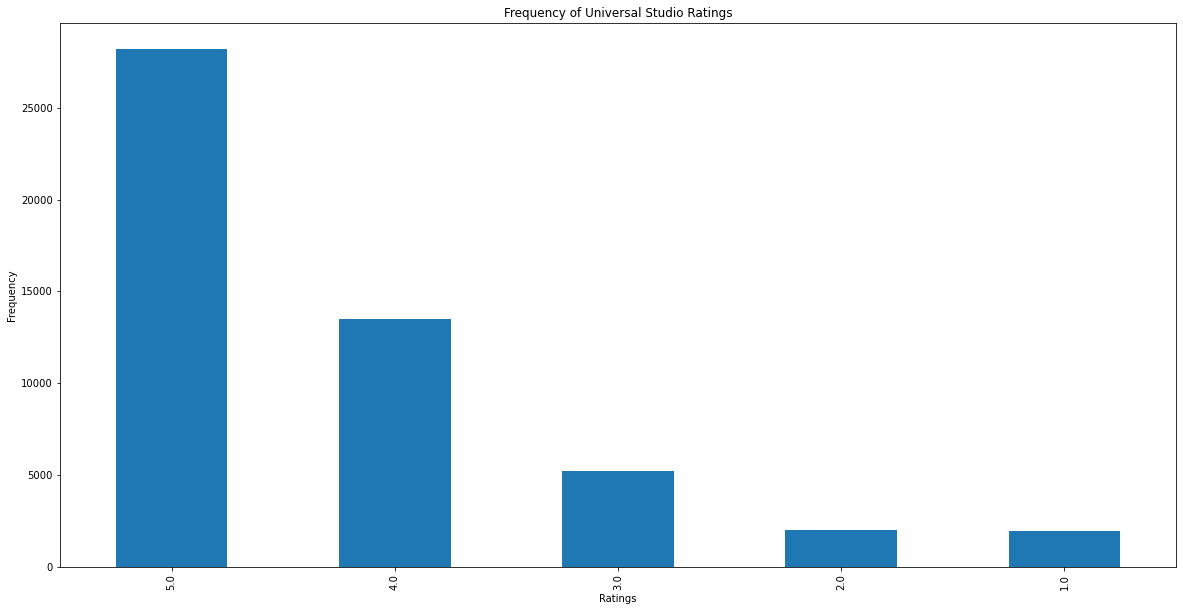

In [223]:
#frequency of ratings

rating = universal['rating']
fig, ax = plt.subplots()
rating.value_counts().plot(ax=ax, kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Universal Studio Ratings')

In [11]:
rating.value_counts()

5.0    28202
4.0    13514
3.0     5229
2.0     1986
1.0     1973
Name: rating, dtype: int64

In [12]:
#ratings vs date
#breaking data into date, month, and year
universal['written_date'] = pd.to_datetime(universal['written_date'], format = '%Y%m%d')
universal['year'] = pd.DatetimeIndex(universal['written_date']).year
universal['day'] = pd.DatetimeIndex(universal['written_date']).day
universal['month'] = pd.DatetimeIndex(universal['written_date']).month
universal

,reviewer,rating,written_date,title,review_text,branch,year,day,month
0,Kelly B,2.0,2021-05-30,Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida,2021,30,5
1,Jon,1.0,2021-05-30,Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida,2021,30,5
2,Nerdy P,2.0,2021-05-30,Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,2021,30,5
3,ran101278,4.0,2021-05-29,My opinion,When a person tries the test seat for the ride...,Universal Studios Florida,2021,29,5
4,tammies20132015,5.0,2021-05-28,The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,2021,28,5
...,...,...,...,...,...,...,...,...,...
50899,vinz20,4.0,2010-03-29,I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore,2010,29,3
50900,betty l,4.0,2010-03-29,Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore,2010,29,3
50901,spoonos65,4.0,2010-03-28,Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore,2010,28,3
50902,HeatSeekerWrexham_UK,4.0,2010-03-22,Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,2010,22,3


In [13]:
print(sorted(universal['year'].unique()))


[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [14]:
#break data into year and rating
yearrat = universal[['year', 'rating']]
yearrat

,year,rating
0,2021,2.0
1,2021,1.0
2,2021,2.0
3,2021,4.0
4,2021,5.0
...,...,...
50899,2010,4.0
50900,2010,4.0
50901,2010,4.0
50902,2010,4.0


In [15]:
#count of ratings per year
yearratbreak1 = yearrat.groupby(['year', 'rating']).size().reset_index(name = 'count')
yearratbreak1

,year,rating,count
0,2002,1.0,1
1,2003,4.0,3
2,2003,5.0,4
3,2004,1.0,9
4,2004,2.0,5
...,...,...,...
88,2021,1.0,87
89,2021,2.0,35
90,2021,3.0,29
91,2021,4.0,42


In [16]:
rat1 = yearratbreak1.loc[yearratbreak1['rating'] == 1.0]
rat1

rat1count = [1, 0, 9, 6, 9, 11, 14, 17, 38, 46, 79, 117, 169, 227, 253, 206, 288, 297, 99, 87]

In [17]:
rat2 = yearratbreak1.loc[yearratbreak1['rating'] == 2.0]
rat2

rat2count = [0, 0, 5, 7, 10, 13, 14, 17, 56, 70, 98, 138, 220, 268, 286, 229, 239, 228, 53, 35]

In [18]:
rat3 = yearratbreak1.loc[yearratbreak1['rating'] == 3.0]
rat3

rat3count = [0, 0, 4, 3, 7, 3, 7, 32, 68, 159, 260, 425, 622, 852, 850, 648, 644, 503, 113, 29]

In [19]:
rat4 = yearratbreak1.loc[yearratbreak1['rating'] == 4.0]
rat4

rat4count = [0, 3, 11, 5, 11, 19, 32, 37, 124, 329, 738, 1149, 1574, 2393, 2489, 1848, 1448, 1052, 210, 42]

In [20]:
rat5 = yearratbreak1.loc[yearratbreak1['rating'] == 5.0]
rat5 
rat5count = [0, 4, 28, 19, 23, 34, 27, 66, 128, 394, 1095, 1960, 2867, 5361, 5422, 4212, 3556, 2390, 524, 92]

In [229]:
#ratings per year

year = list(range(2002, 2022, 1))
year1 = pd.DataFrame(year)
year1.columns = ['Year']

In [46]:
#create dataframe for year and rating analysis
rat1countdf = pd.DataFrame(rat1count, columns = ['Rating 1'])
rat2countdf = pd.DataFrame(rat2count, columns = ['Rating 2'])
rat3countdf = pd.DataFrame(rat3count, columns = ['Rating 3'])
rat4countdf = pd.DataFrame(rat4count, columns = ['Rating 4'])
rat5countdf = pd.DataFrame(rat5count, columns = ['Rating 5'])

yearrat = rat1countdf.join(rat2countdf)
yearrat = yearrat.join(rat3countdf)
yearrat = yearrat.join(rat4countdf)
yearrat = yearrat.join(rat5countdf)
yearrat = yearrat.join(year1)
yearrat


,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Year
0,1,0,0,0,0,2002
1,0,0,0,3,4,2003
2,9,5,4,11,28,2004
3,6,7,3,5,19,2005
4,9,10,7,11,23,2006
5,11,13,3,19,34,2007
6,14,14,7,32,27,2008
7,17,17,32,37,66,2009
8,38,56,68,124,128,2010
9,46,70,159,329,394,2011


<AxesSubplot:title={'center':'Universal Studios Ratings Per Year Stacked Bar Chart'}, xlabel='Year'>

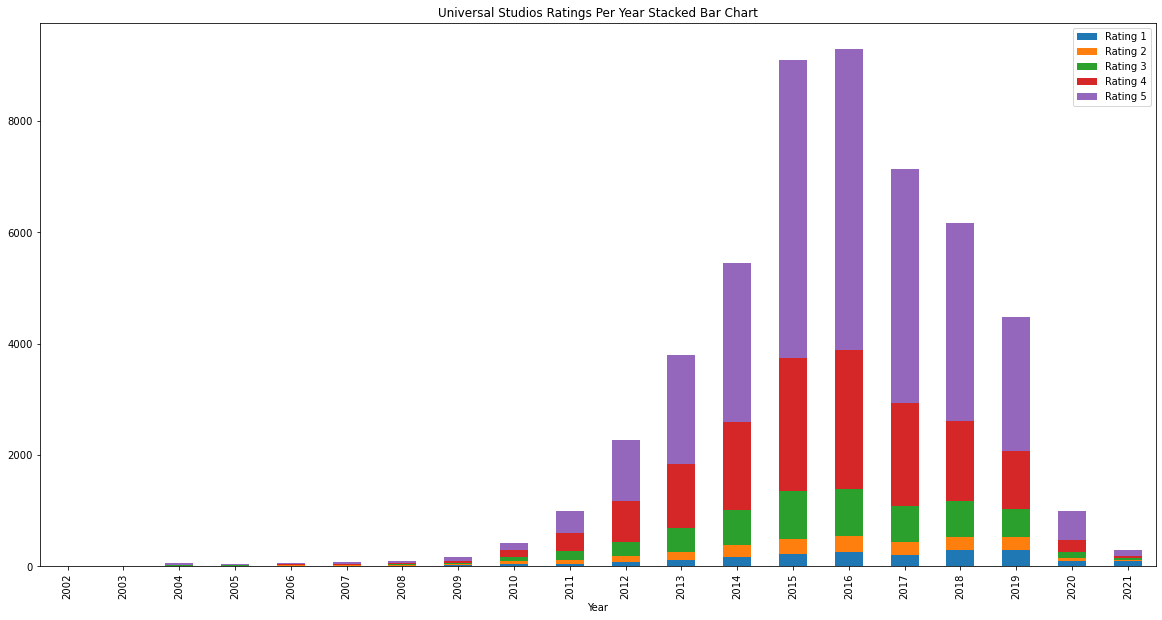

In [226]:
plt.rcParams["figure.figsize"] = (20,10)
yearrat.plot(
    x = 'Year',
    kind = 'bar',
    stacked = True,
    title = 'Universal Studios Ratings Per Year Stacked Bar Chart',
    mark_right = True)

<AxesSubplot:title={'center':'Universal Studios Ratings Per Year Bar Chart'}, xlabel='Year'>

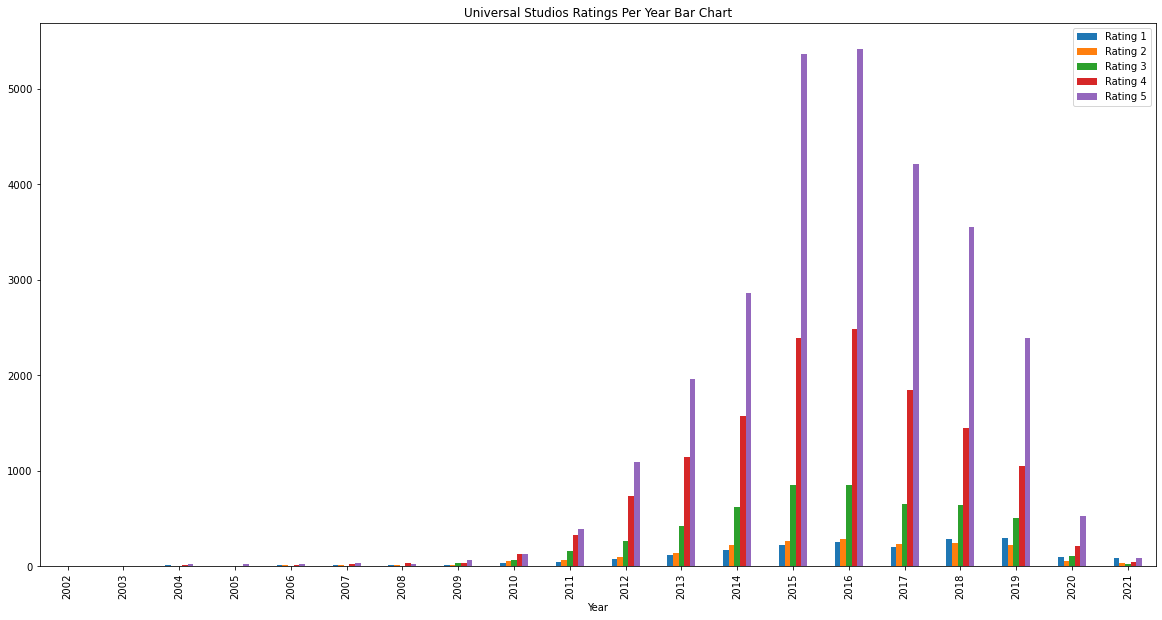

In [228]:
plt.rcParams["figure.figsize"] = (20,10)
yearrat.plot(
    x = 'Year',
    kind = 'bar',
    stacked = False,
    title = 'Universal Studios Ratings Per Year Bar Chart',
    mark_right = True)

In [54]:
#Count of ratings per month
#break data into year and rating
monthrat = universal[['month', 'rating']]
monthrat


,month,rating
0,5,2.0
1,5,1.0
2,5,2.0
3,5,4.0
4,5,5.0
...,...,...
50899,3,4.0
50900,3,4.0
50901,3,4.0
50902,3,4.0


In [57]:
#count of ratings per month
monthratbreak = monthrat.groupby(['month', 'rating']).size().reset_index(name = 'count')
monthratbreak 

,month,rating,count
0,1,1.0,194
1,1,2.0,206
2,1,3.0,534
3,1,4.0,1269
4,1,5.0,2328
5,2,1.0,110
6,2,2.0,124
7,2,3.0,355
8,2,4.0,871
9,2,5.0,1758


In [153]:
#separating ratings per month
ratmonth1 = monthratbreak.loc[monthratbreak['rating'] == 1.0]
ratmonth1


ratmonthcount1 = np.array(ratmonth1['count'])
ratmonthcount1 = pd.DataFrame(ratmonthcount1, columns = ['Rating 1'])
ratmonthcount1

,Rating 1
0,194
1,110
2,162
3,199
4,112
5,109
6,216
7,214
8,120
9,224


In [154]:
ratmonth2 = monthratbreak.loc[monthratbreak['rating'] == 2.0]
ratmonth2

ratmonthcount2 = np.array(ratmonth2['count'])
ratmonthcount2 = pd.DataFrame(ratmonthcount2, columns = ['Rating 2'])
ratmonthcount2


,Rating 2
0,206
1,124
2,152
3,174
4,143
5,155
6,201
7,199
8,144
9,198


In [158]:
ratmonth3 = monthratbreak.loc[monthratbreak['rating'] == 3.0]
ratmonth3

ratmonthcount3 = np.array(ratmonth3['count'])
ratmonthcount3 = pd.DataFrame(ratmonthcount3, columns = ['Rating 3'])
ratmonthcount3

,Rating 3
0,534
1,355
2,420
3,472
4,397
5,371
6,553
7,514
8,374
9,439


In [159]:
ratmonth4 = monthratbreak.loc[monthratbreak['rating'] == 4.0]
ratmonth4

ratmonthcount4 = np.array(ratmonth4['count'])
ratmonthcount4 = pd.DataFrame(ratmonthcount4, columns = ['Rating 4'])
ratmonthcount4

,Rating 4
0,1269
1,871
2,1020
3,1234
4,1050
5,1150
6,1394
7,1302
8,985
9,1185


In [160]:
ratmonth5 = monthratbreak.loc[monthratbreak['rating'] == 5.0]
ratmonth5 

ratmonthcount5 = np.array(ratmonth5['count'])
ratmonthcount5 = pd.DataFrame(ratmonthcount5, columns = ['Rating 5'])
ratmonthcount5

,Rating 5
0,2328
1,1758
2,2191
3,2365
4,2201
5,2482
6,2902
7,2749
8,2463
9,2646


In [167]:
#create month data frame
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = pd.DataFrame(month)
months.columns = ['Month']
months

,Month
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


In [168]:
ratmonthdf = ratmonthcount1.join(ratmonthcount2)
ratmonthdf = ratmonthdf.join(ratmonthcount3)
ratmonthdf = ratmonthdf.join(ratmonthcount4)
ratmonthdf = ratmonthdf.join(ratmonthcount5)
ratmonthdf = ratmonthdf.join(months)
ratmonthdf

ratmonthdf

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Month
0,194,206,534,1269,2328,January
1,110,124,355,871,1758,February
2,162,152,420,1020,2191,March
3,199,174,472,1234,2365,April
4,112,143,397,1050,2201,May
5,109,155,371,1150,2482,June
6,216,201,553,1394,2902,July
7,214,199,514,1302,2749,August
8,120,144,374,985,2463,September
9,224,198,439,1185,2646,October


Text(0, 0.5, 'Frequency')

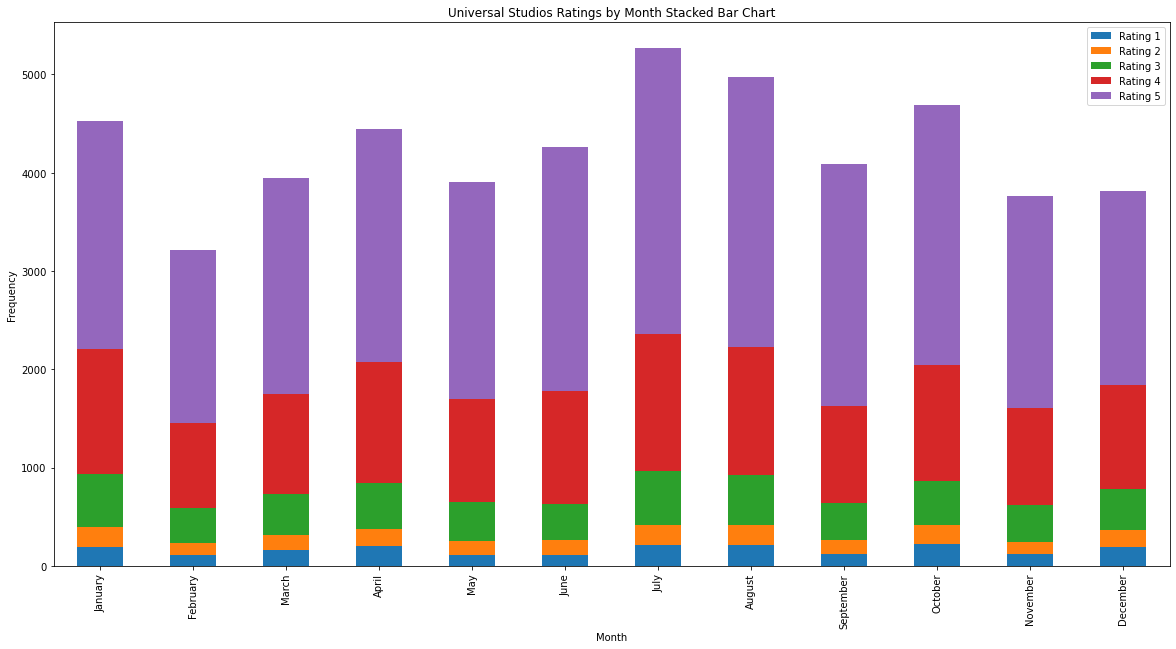

In [230]:
plt.rcParams["figure.figsize"] = (20,10)

ratmonthdf.plot(
 x = 'Month',
    kind = 'bar',
    stacked = True)
plt.title('Universal Studios Ratings by Month Stacked Bar Chart')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

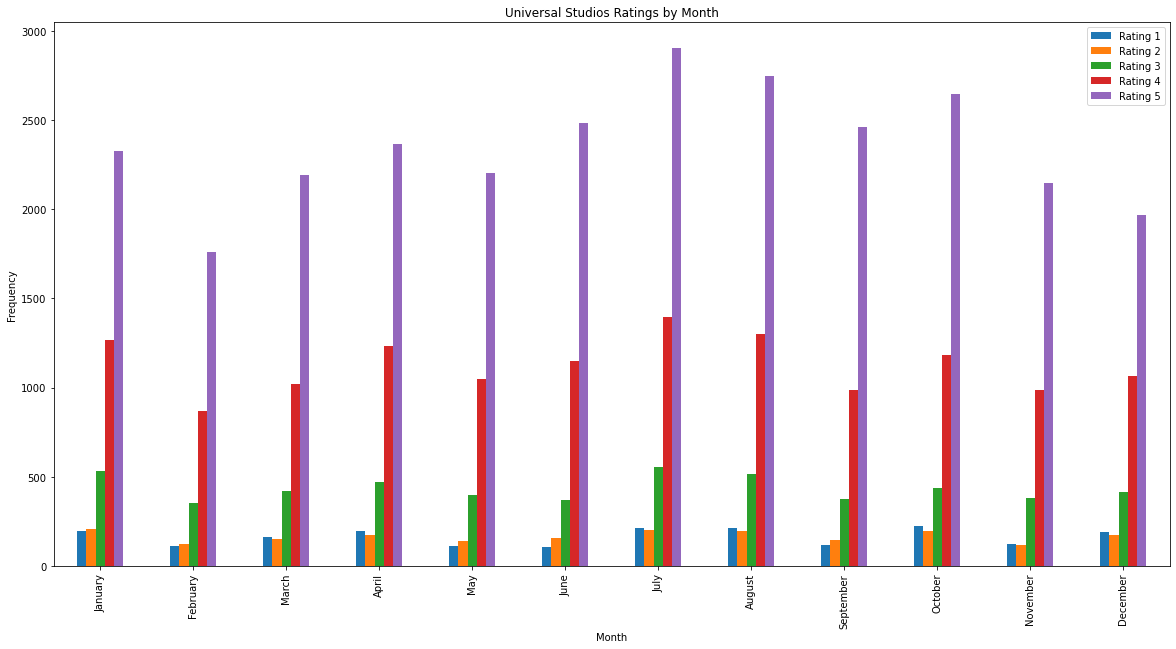

In [196]:
plt.rcParams["figure.figsize"] = (20,10)

ratmonthdf.plot(
    x = 'Month',
    kind = 'bar',
    stacked = False,
    title = 'Stacked Bar Graph',
    mark_right = False)
plt.title('Universal Studios Ratings by Month')
plt.ylabel('Frequency')


In [197]:
#plot Day vs Ratings

dayrat = universal[['day', 'rating']]
dayrat

,day,rating
0,30,2.0
1,30,1.0
2,30,2.0
3,29,4.0
4,28,5.0
...,...,...
50899,29,4.0
50900,29,4.0
50901,28,4.0
50902,22,4.0


In [199]:
#count of ratings per day
dayrat1 = dayrat.groupby(['day', 'rating']).size().reset_index(name = 'count')
dayrat1

,day,rating,count
0,1,1.0,59
1,1,2.0,65
2,1,3.0,158
3,1,4.0,446
4,1,5.0,915
...,...,...,...
150,31,1.0,49
151,31,2.0,41
152,31,3.0,116
153,31,4.0,281


In [208]:
ratday1 = dayrat1.loc[dayrat1['rating'] == 1.0]
ratday1

ratday1count = np.array(ratday1['count'])
ratday1count = pd.DataFrame(ratday1count, columns = ['Rating 1'])
ratday1count


,Rating 1
0,59
1,84
2,73
3,74
4,62
5,62
6,79
7,79
8,63
9,55


In [209]:
ratday2 = dayrat1.loc[dayrat1['rating'] == 2.0]
ratday2

ratday2count = np.array(ratday2['count'])
ratday2count = pd.DataFrame(ratday2count, columns = ['Rating 2'])
ratday2count

,Rating 2
0,65
1,67
2,63
3,77
4,51
5,59
6,57
7,67
8,66
9,66


In [210]:
ratday3 = dayrat1.loc[dayrat1['rating'] == 3.0]
ratday3

ratday3count = np.array(ratday3['count'])
ratday3count = pd.DataFrame(ratday3count, columns = ['Rating 3'])
ratday3count

,Rating 3
0,158
1,203
2,172
3,170
4,167
5,169
6,189
7,196
8,167
9,162


In [211]:
ratday4 = dayrat1.loc[dayrat1['rating'] == 4.0]
ratday4

ratday4count = np.array(ratday4['count'])
ratday4count = pd.DataFrame(ratday4count, columns = ['Rating 4'])
ratday4count

,Rating 4
0,446
1,453
2,521
3,444
4,452
5,447
6,462
7,438
8,438
9,454


In [212]:
ratday5 = dayrat1.loc[dayrat1['rating'] == 5.0]
ratday5

ratday5count = np.array(ratday5['count'])
ratday5count = pd.DataFrame(ratday5count, columns = ['Rating 5'])
ratday5count

,Rating 5
0,915
1,924
2,942
3,988
4,936
5,924
6,918
7,928
8,956
9,905


In [214]:
day = list(range(1, 32, 1))
day = pd.DataFrame(day)
day.columns = ['Day']
day

,Day
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [215]:
ratdaydf = ratday1count.join(ratday2count)
ratdaydf = ratdaydf.join(ratday3count)
ratdaydf = ratdaydf.join(ratday4count)
ratdaydf = ratdaydf.join(ratday5count)
ratdaydf = ratdaydf.join(day)
ratdaydf


,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Day
0,59,65,158,446,915,1
1,84,67,203,453,924,2
2,73,63,172,521,942,3
3,74,77,170,444,988,4
4,62,51,167,452,936,5
5,62,59,169,447,924,6
6,79,57,189,462,918,7
7,79,67,196,438,928,8
8,63,66,167,438,956,9
9,55,66,162,454,905,10


Text(0, 0.5, 'Frequency')

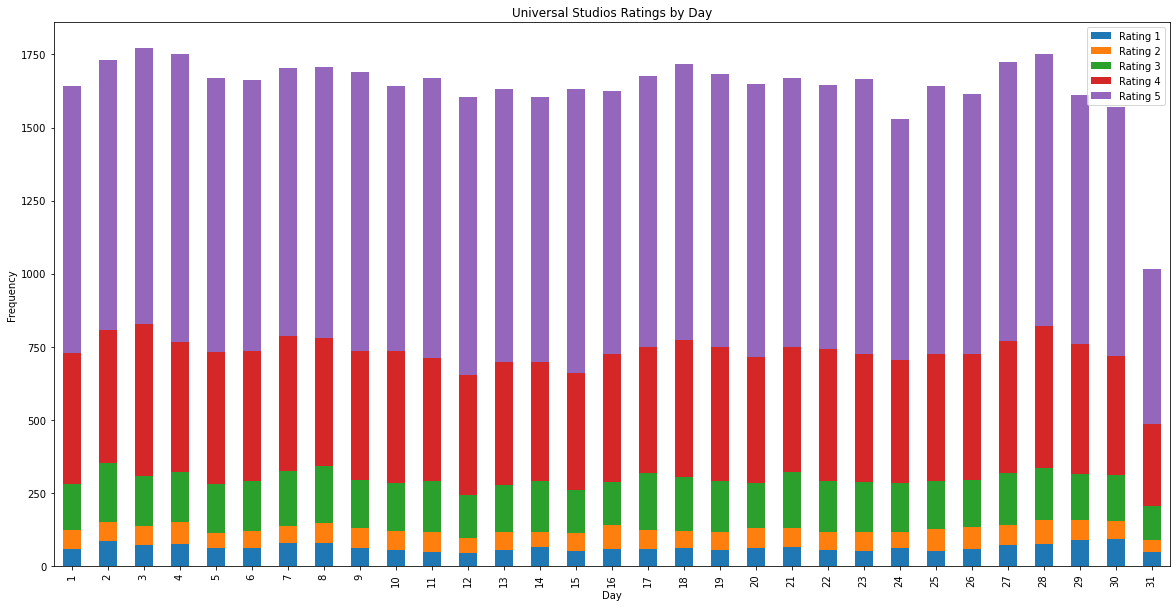

In [218]:
plt.rcParams["figure.figsize"] = (20,10)

ratdaydf.plot(
 x = 'Day',
    kind = 'bar',
    stacked = True)
plt.title('Universal Studios Ratings by Day')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

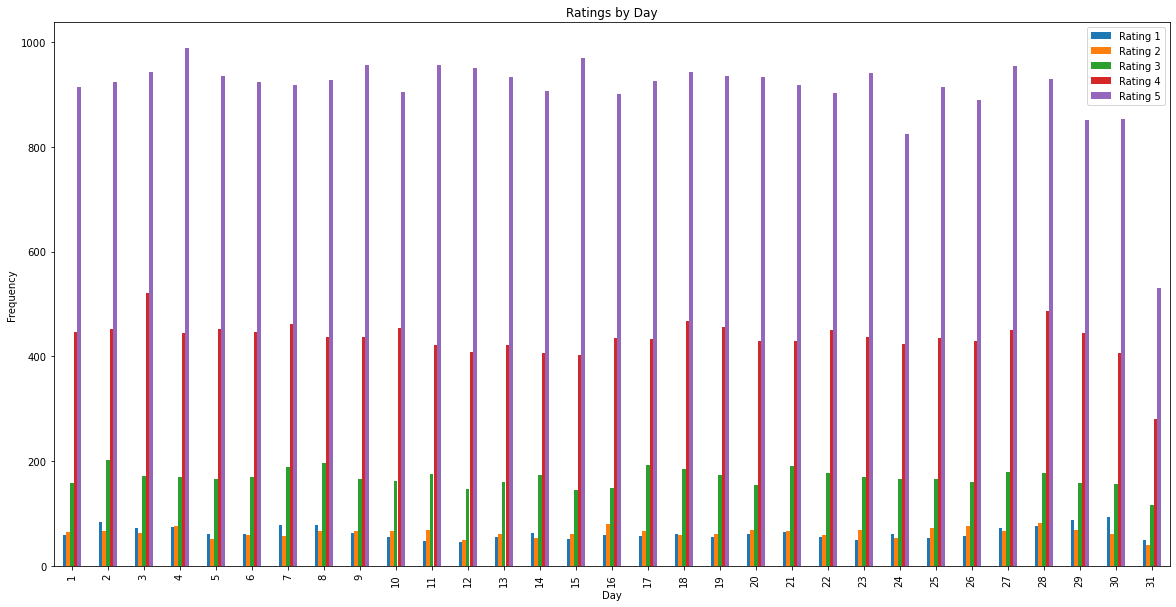

In [221]:
plt.rcParams["figure.figsize"] = (20,10)

ratdaydf.plot(
    x = 'Day',
    kind = 'bar',
    stacked = False,
    title = 'Ratings by Day',
    mark_right = False)
plt.ylabel('Frequency')

In [250]:
#ratings per branch

#break data into year and branch
branchrat = universal[['rating', 'branch', 'year']]
branchrat

,rating,branch,year
0,2.0,Universal Studios Florida,2021
1,1.0,Universal Studios Florida,2021
2,2.0,Universal Studios Florida,2021
3,4.0,Universal Studios Florida,2021
4,5.0,Universal Studios Florida,2021
...,...,...,...
50899,4.0,Universal Studios Singapore,2010
50900,4.0,Universal Studios Singapore,2010
50901,4.0,Universal Studios Singapore,2010
50902,4.0,Universal Studios Singapore,2010


In [251]:
branchrat['branch'].unique()

array(['Universal Studios Florida', 'Universal Studios Japan',
       'Universal Studios Singapore'], dtype=object)

In [252]:
#break data into branches and year
florida = branchrat.loc[branchrat['branch'] == 'Universal Studios Florida']
japan = branchrat.loc[branchrat['branch'] == 'Universal Studios Japan']
singapore = branchrat.loc[branchrat['branch'] == 'Universal Studios Singapore']

In [286]:
florida['rating'].value_counts()

5.0    17978
4.0     6940
3.0     2960
1.0     1374
2.0     1369
Name: rating, dtype: int64

In [287]:
japan['rating'].value_counts()

5.0    2076
4.0    1531
3.0     557
1.0     194
2.0     171
Name: rating, dtype: int64

In [288]:
singapore['rating'].value_counts()

5.0    8148
4.0    5043
3.0    1712
2.0     446
1.0     405
Name: rating, dtype: int64

Text(0.5, 1.0, 'Frequency of Universal Studio Florida Ratings')

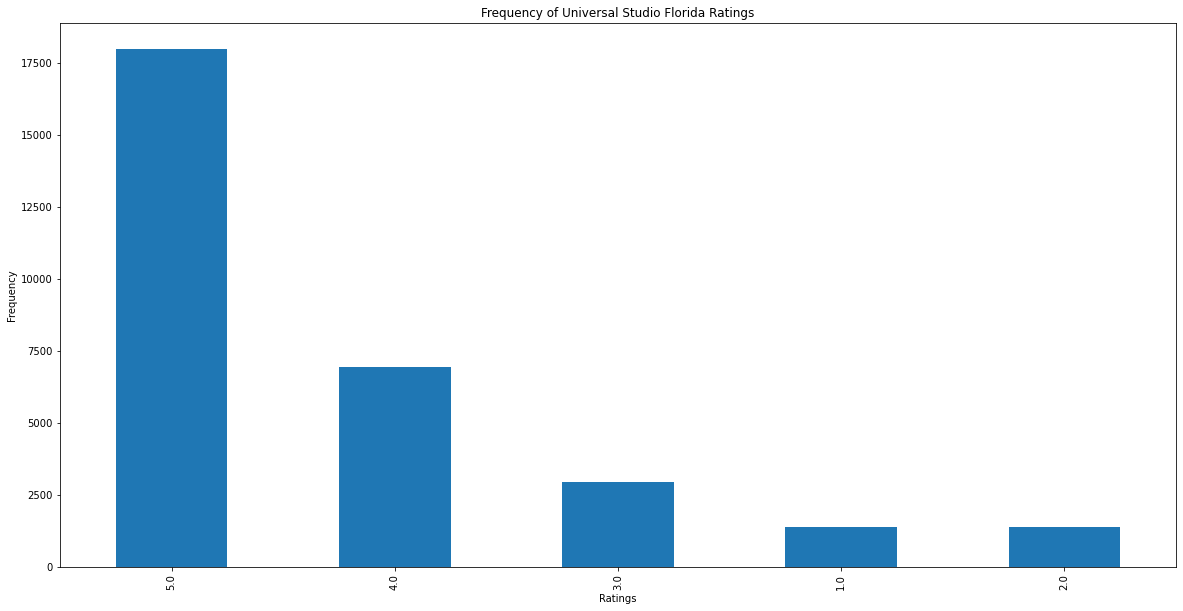

In [256]:
#florida ratings
rating = florida['rating']
fig, ax = plt.subplots()
rating.value_counts().plot(ax=ax, kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Universal Studio Florida Ratings')

Text(0.5, 1.0, 'Frequency of Universal Studio Japan Ratings')

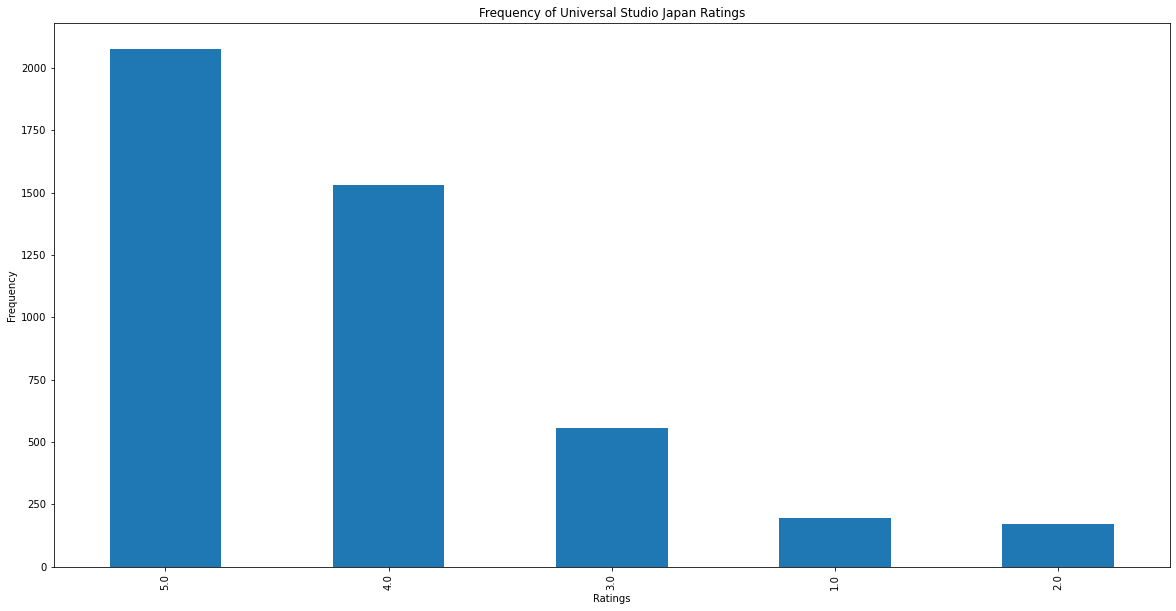

In [257]:
#Japan ratings
rating = japan['rating']
fig, ax = plt.subplots()
rating.value_counts().plot(ax=ax, kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Universal Studio Japan Ratings')

Text(0.5, 1.0, 'Frequency of Universal Studio Singapore Ratings')

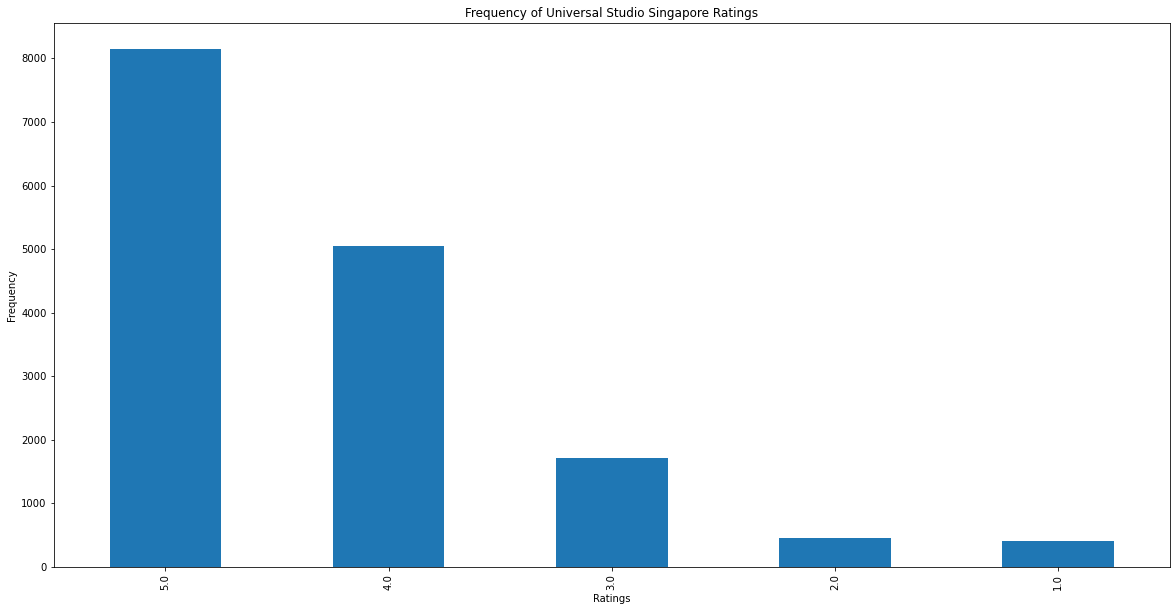

In [258]:
#florida ratings
rating = singapore['rating']
fig, ax = plt.subplots()
rating.value_counts().plot(ax=ax, kind = 'bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Frequency of Universal Studio Singapore Ratings')

In [277]:
#florida rating per year
florida1 = florida.groupby(['year', 'rating']).size().reset_index(name = 'count')
florida1

,year,rating,count
0,2002,1.0,1
1,2003,4.0,3
2,2003,5.0,4
3,2004,1.0,9
4,2004,2.0,5
...,...,...,...
88,2021,1.0,81
89,2021,2.0,34
90,2021,3.0,26
91,2021,4.0,36


In [278]:
floridarat1 = florida1.loc[florida1['rating'] == 1.0]
floridarat1

floridarat1 = [1,0,9,11,14,17,35,39,64,98,121,140,168,135,190,174,62,81]
floridarat1 = pd.DataFrame(floridarat1, columns = ['Rating 1'])
floridarat1

,Rating 1
0,1
1,0
2,9
3,11
4,14
5,17
6,35
7,39
8,64
9,98


In [279]:
floridarat2 = florida1.loc[florida1['rating'] == 2.0]
floridarat2

floridarat2 = [0,0,5,7,10,13,12,17,42,50,77,108,148,175,192,142,163,132,42,34]
floridarat2 = pd.DataFrame(floridarat2, columns = ['Rating 2'])
floridarat2

,Rating 2
0,0
1,0
2,5
3,7
4,10
5,13
6,12
7,17
8,42
9,50


In [280]:
floridarat3 = florida1.loc[florida1['rating'] == 3.0]
floridarat3

floridarat3 = [0,0,4,3,7,3,7,32,38,73,153,250,334,447,491,357,390,285,59,26]
floridarat3 = pd.DataFrame(floridarat3, columns = ['Rating 3'])
floridarat3

,Rating 3
0,0
1,0
2,4
3,3
4,7
5,3
6,7
7,32
8,38
9,73


In [281]:
floridarat4 = florida1.loc[florida1['rating'] == 4.0]
floridarat4

floridarat4 = [0,3,11,5,11,18,32,36,89,156,271,526,818,1226,1302,968,770,534,128,36]
floridarat4 = pd.DataFrame(floridarat4, columns = ['Rating 4'])
floridarat4

,Rating 4
0,0
1,3
2,11
3,5
4,11
5,18
6,32
7,36
8,89
9,156


In [282]:
floridarat5 = florida1.loc[florida1['rating'] == 5.0]
floridarat5

floridarat5 = [0,4,28,19,23,33,27,66,112,235,473,1054,1866,3583,3465,2698,2418,1450,347,77]
floridarat5 = pd.DataFrame(floridarat5, columns = ['Rating 5'])
floridarat5

,Rating 5
0,0
1,4
2,28
3,19
4,23
5,33
6,27
7,66
8,112
9,235


In [283]:
floridayeardf = floridarat1.join(floridarat2)
floridayeardf = floridayeardf.join(floridarat3)
floridayeardf = floridayeardf.join(floridarat4)
floridayeardf = floridayeardf.join(floridarat5)
floridayeardf = floridayeardf.join(year1)
floridayeardf

,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,Year
0,1,0,0,0,0,2002
1,0,0,0,3,4,2003
2,9,5,4,11,28,2004
3,11,7,3,5,19,2005
4,14,10,7,11,23,2006
5,17,13,3,18,33,2007
6,35,12,7,32,27,2008
7,39,17,32,36,66,2009
8,64,42,38,89,112,2010
9,98,50,73,156,235,2011


<AxesSubplot:title={'center':'Universal Studios Florida Ratings Per Year Stacked Bar Chart'}, xlabel='Year'>

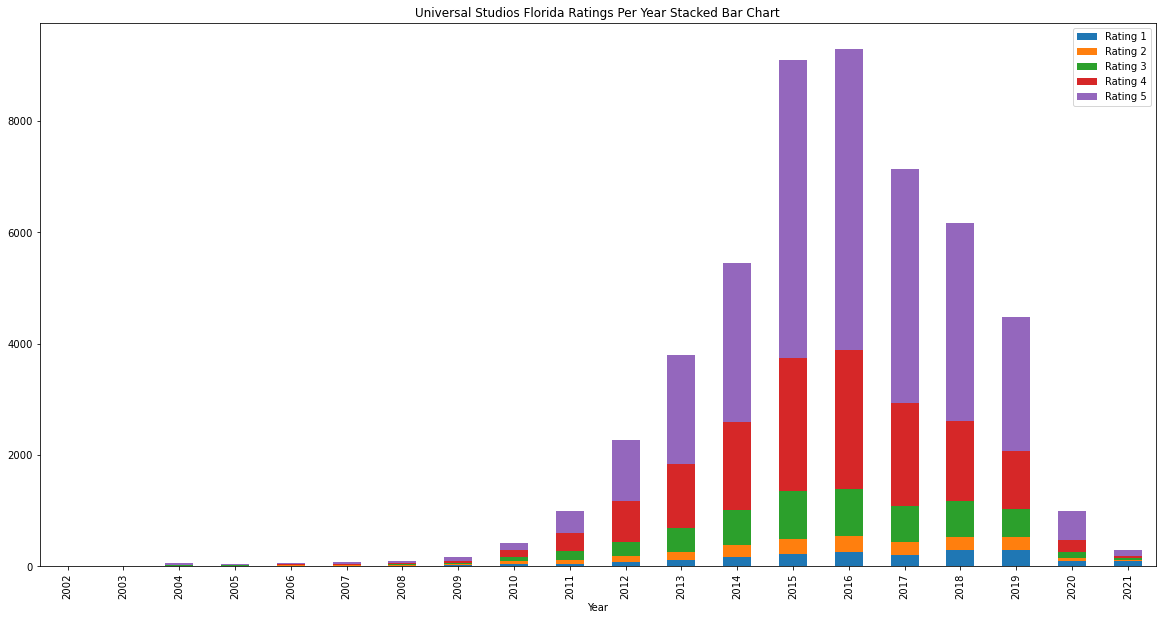

In [284]:
plt.rcParams["figure.figsize"] = (20,10)
yearrat.plot(
    x = 'Year',
    kind = 'bar',
    stacked = True,
    title = 'Universal Studios Florida Ratings Per Year Stacked Bar Chart',
    mark_right = True)

In [ ]:
#singapore ratings per year
sing = singapore.groupby(['month', 'rating']).size().reset_index(name = 'count')
florida1